In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Activation Functions

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)
    

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2


def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x)

def softmax_derivative(x):
    s = softmax(x)
    return s * (1 - s)

##### Dataset visualization

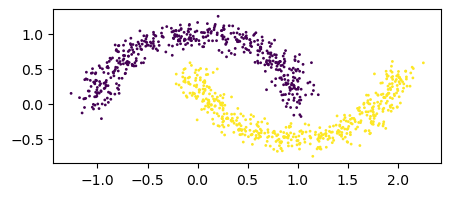

In [3]:
points = np.genfromtxt('data/cluster_moons.csv', delimiter=',')
points = points[1:len(points)]
x      = points[:,0]
y      = points[:,1]
labels = points[:,2]
plt.figure(figsize=(5,2))
plt.scatter(x, y, c=labels, s=1)
plt.show()

### Task 0

In [4]:
inputs  = np.column_stack((x, y))
outputs = labels.reshape(-1, 1)



print("Inputs shape: ", inputs.shape)
print("Outputs shape: ", outputs.shape)

print("Cluster 0: ", len(outputs[outputs == 0]))
print("Cluster 1: ", len(outputs[outputs == 1]))

Inputs shape:  (1000, 2)
Outputs shape:  (1000, 1)
Cluster 0:  500
Cluster 1:  500


## Task 0 Questions

#### How many features are in the inputs variable, and how much is its length?
 **Input features is 2** 
  **Input length is 1000**
#### What many output features are in the outputs variable, and how much is its length?
  **Output length is 1000**
   **Output feature is 1**
#### How many points belong to cluster 0, and how many points belong to cluster 1?
   **Both cluster have 500 points**

## Task 1: 0 Hidden Layer ANN Architecture

In [5]:
def weights(input_size, output_size):
    weights_input_output = 2 * np.random.random((input_size, output_size)) - 1
    return weights_input_output

def bias(output_size):
    bias_output = np.random.randn(1, output_size)
    return bias_output


In [6]:
def plot_cost_graph(cost_graph,x,y, output_layer):
    
    plt.figure(figsize=(3, 2))
    plt.plot(cost_graph)
    plt.figure(figsize=(3, 2))
    plt.scatter(x, y, c=output_layer, s=1)
    plt.show()
    return min(cost_graph),cost_graph[-1]

In [7]:
def algorithm_no_hidden_layers(inputs,outputs,epochs= 1000, lr=1,activation_function="sigmoid"):
    if activation_function == "sigmoid":
        activation = sigmoid
        activation_derivative = sigmoid_derivative
    elif activation_function == "tanh":
        activation = tanh
        activation_derivative = tanh_derivative
    elif activation_function == "relu":
        activation = relu
        activation_derivative = relu_derivative
    elif activation_function == "softmax":
        activation = softmax
        activation_derivative = softmax_derivative
        
    else:
        raise ValueError("Unknown activation function: {}".format(activation_function))
    
    weights_input_output = weights(inputs.shape[1], outputs.shape[1])
    w_output_size = outputs.shape[1]
    bias_output = bias(w_output_size)
    cost_graph = []

    for epoch in range(epochs):
        output_layer = activation(np.dot(inputs, weights_input_output) + bias_output)
        
        output_error = outputs - output_layer
        loss = np.mean(np.square(output_error))
        cost_graph.append(loss)

        output_delta = output_error * activation_derivative(output_layer)

        weights_input_output += inputs.T.dot(output_delta)
        bias_output += np.sum(output_delta, axis=0, keepdims=True)

    min_cost ,final_cost = plot_cost_graph(cost_graph, inputs[:, 0], inputs[:, 1], output_layer)
    print("Minimum cost: ", min_cost)
    print("Final cost: ", final_cost)
    
    return output_layer
    
   



**sigmoid function**

Sigmoid outputs values between 0 and 1, directly matching the binary labels (0 and 1). This allows the model to separate the two classes effectively, though some misclassifications occur near the decision boundary due to vanishing gradients.

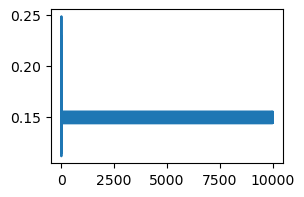

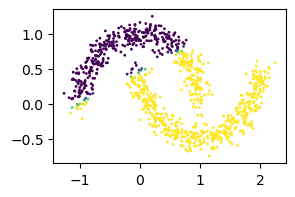

Minimum cost:  0.11155597932446454
Final cost:  0.15519117203942767


In [8]:


output_layer = algorithm_no_hidden_layers(
    inputs, outputs, epochs=10000, lr=1, activation_function="sigmoid"
)


**tanh function**


### Change from the sigmoid activation to tanh. What is the effect on the scatter plot?

**Tanh outputs values between -1 and 1, which doesn’t directly map to labels 0 and 1. In some runs, the model learns to separate classes by mapping negative values to 0 and positive to 1, but in others, it fails, assigning all points to one class due to inconsistent output interpretation.**

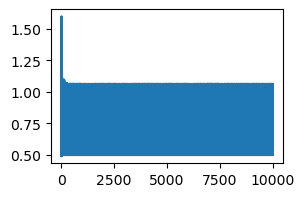

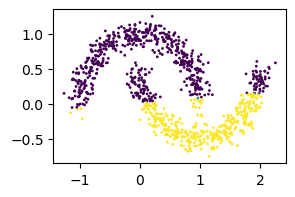

Minimum cost:  0.49014253236307753
Final cost:  1.0615031355541196


In [27]:
output_layer = algorithm_no_hidden_layers(
    inputs, outputs, epochs=10000, lr=1, activation_function="tanh"
)


**relu function**

### Change from the tanh activation to relu. What is the effect on the scatter plot?
**ReLU outputs <math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>max</mi><mo>⁡</mo><mo stretchy="false">(</mo><mn>0</mn><mo separator="true">,</mo><mi>x</mi><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex"> \max(0, x) </annotation></semantics></math>, producing only non-negative values. With no hidden layers, it struggles to model negative relationships, causing all outputs to be interpreted as one class (e.g., all 1s), failing to separate the two classes.**

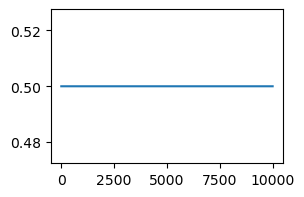

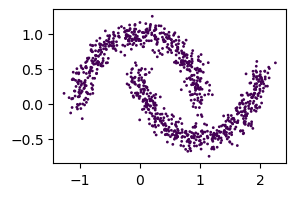

Minimum cost:  0.5
Final cost:  0.5


In [21]:
output_layer = algorithm_no_hidden_layers(
    inputs, outputs, epochs=10000, lr=1, activation_function="relu"
)

**softmax function**

### Change from the relu activation to softmax. What is the effect on the scatter plot?
**Softmax exponentiates inputs (<math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msup><mi>e</mi><msub><mi>x</mi><mi>i</mi></msub></msup></mrow><annotation encoding="application/x-tex"> e^{x_i} </annotation></semantics></math>), leading to overflow with large values or high learning rates. Reducing the learning rate or epochs can help, but softmax is designed for multi-class tasks, not single-output binary classification, so it fails to separate classes, labeling all points as one.**

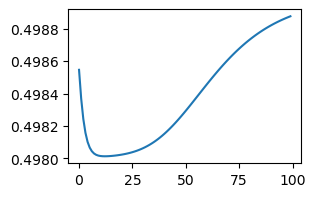

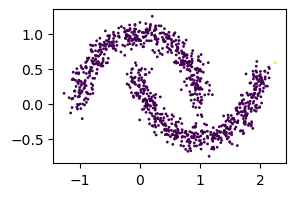

Minimum cost:  0.4980131936809049
Final cost:  0.4988778558299287


In [11]:
output_layer = algorithm_no_hidden_layers(
    inputs, outputs, epochs=100, lr=1, activation_function="softmax"
)

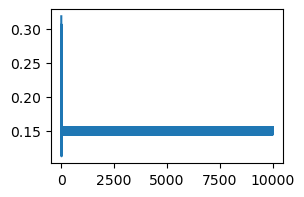

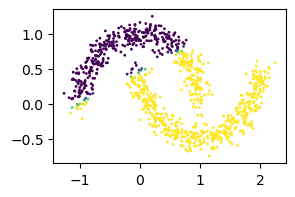

Minimum cost:  0.11224506484000543
Final cost:  0.15519117203942767


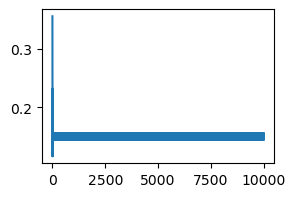

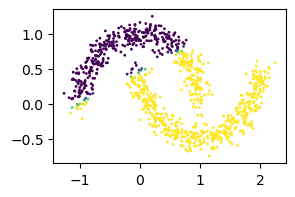

Minimum cost:  0.11579961983645566
Final cost:  0.15519117203942767


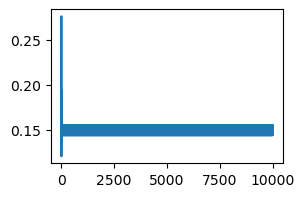

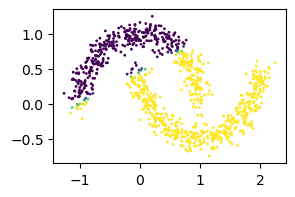

Minimum cost:  0.12054599312544417
Final cost:  0.15519117203942767


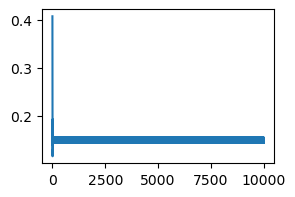

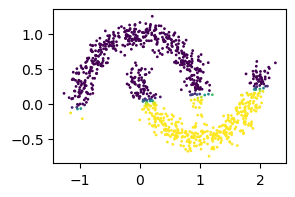

Minimum cost:  0.11599062751930556
Final cost:  0.14409939849801676


In [12]:
for lr in [0.1, 0.01, 0.001,0.0001]:
    
     output_layer = algorithm_no_hidden_layers(
        inputs, outputs, epochs=10000, lr=lr, activation_function="sigmoid"
    )


In [ ]:
def algorithm_one_hidden_layers(inputs,outputs,h_n_size,epochs= 1000, lr=1):
    
    weights_input_hidden = weights(inputs.shape[1], h_n_size)
    weights_hidden_output = weights(h_n_size, outputs.shape[1])

    bias_hidden = bias(h_n_size)
    bias_output = bias(outputs.shape[1])
    cost_graph = []

    for epoch in range(10000):
        hidden_layer = sigmoid(np.dot(inputs, weights_input_hidden) +bias_hidden)
        output_layer = sigmoid(np.dot(hidden_layer, weights_hidden_output) +bias_output)

        output_error = outputs - output_layer
        cost_graph.append(np.mean(np.square(output_error)))
        output_delta = output_error * sigmoid_derivative(output_layer)
        hidden_delta = output_delta.dot(weights_hidden_output.T) *sigmoid_derivative(hidden_layer)
        weights_hidden_output += lr * hidden_layer.T.dot(output_delta)
        weights_input_hidden += lr * inputs.T.dot(hidden_delta)
        bias_output += lr * np.sum(output_delta, axis=0, keepdims=True)
        bias_hidden += lr * np.sum(hidden_delta, axis=0, keepdims=True)
       
    min_cost ,final_cost = plot_cost_graph(cost_graph, inputs[:, 0], inputs[:, 1], output_layer)
    print("Minimum cost: ", min_cost)
    print("Final cost: ", final_cost)
    return  output_layer


   



/tmp/ipykernel_7582/3107163528.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


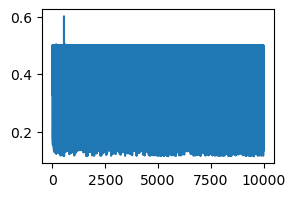

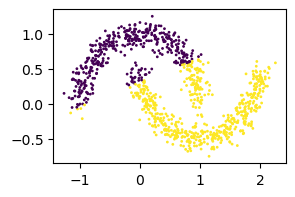

Minimum cost:  0.1141392089839845
Final cost:  0.27550819226299145


In [ ]:
output_layer = algorithm_one_hidden_layers(
    inputs, outputs, h_n_size=2, epochs=10000, lr=1)


/tmp/ipykernel_7582/3107163528.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


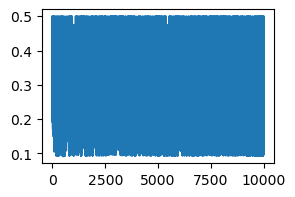

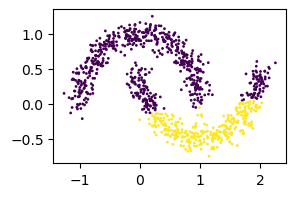

Minimum cost:  0.09131797741728759
Final cost:  0.19199999739962406


In [ ]:
output_layer = algorithm_one_hidden_layers(
    inputs, outputs, h_n_size=4, epochs=10000, lr=1
)

Learning rate:  1  Hidden layer size:  2


/tmp/ipykernel_7582/3107163528.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


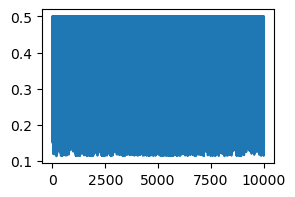

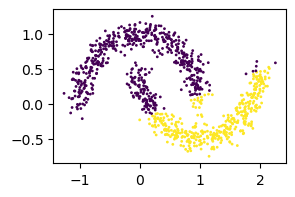

Minimum cost:  0.11373846932221988
Final cost:  0.1379999999996539
Learning rate:  1  Hidden layer size:  8


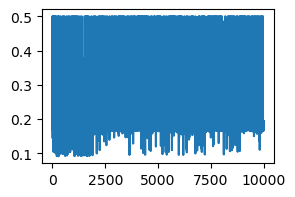

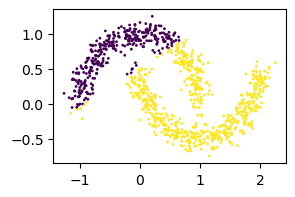

Minimum cost:  0.09145519801037758
Final cost:  0.16899998562632634
Learning rate:  1  Hidden layer size:  16


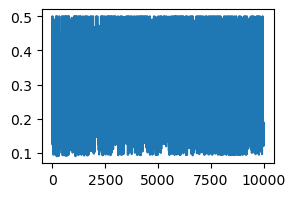

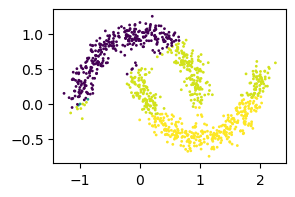

Minimum cost:  0.09043663240090137
Final cost:  0.15145688635939736
Learning rate:  1  Hidden layer size:  20


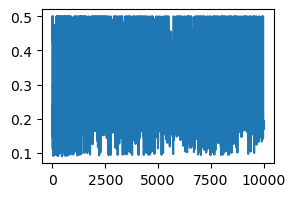

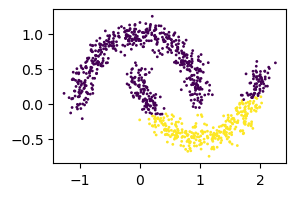

Minimum cost:  0.09080291060909368
Final cost:  0.19186750733351635
Learning rate:  1  Hidden layer size:  24


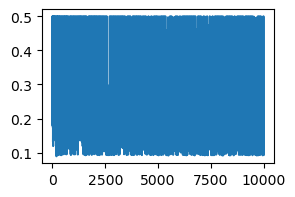

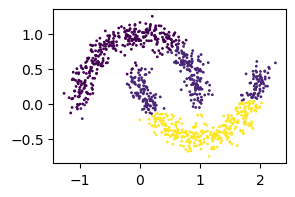

Minimum cost:  0.08916656779803836
Final cost:  0.15829300602456048
Learning rate:  0.1  Hidden layer size:  2


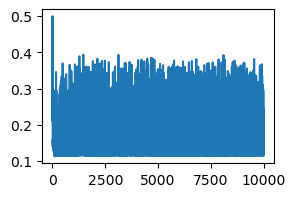

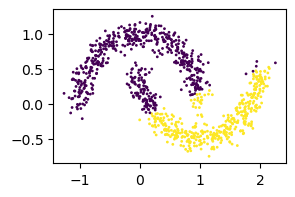

Minimum cost:  0.11245047563699172
Final cost:  0.11699470365737323
Learning rate:  0.1  Hidden layer size:  8


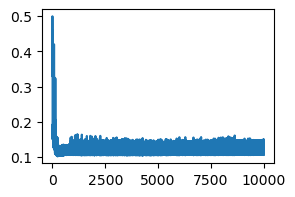

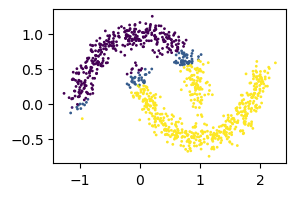

Minimum cost:  0.10239501109228089
Final cost:  0.10790486817673167
Learning rate:  0.1  Hidden layer size:  16


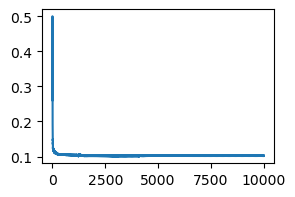

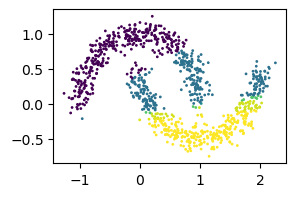

Minimum cost:  0.10077872762367167
Final cost:  0.10158353587776392
Learning rate:  0.1  Hidden layer size:  20


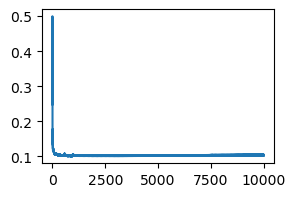

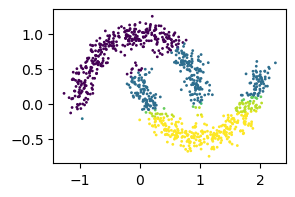

Minimum cost:  0.10054223123458514
Final cost:  0.10268835881910443
Learning rate:  0.1  Hidden layer size:  24


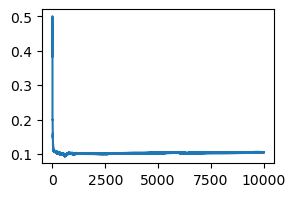

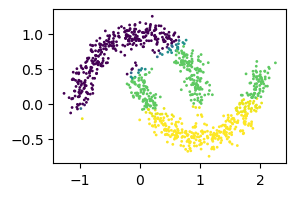

Minimum cost:  0.09362456760209512
Final cost:  0.1059487171780509
Learning rate:  0.01  Hidden layer size:  2


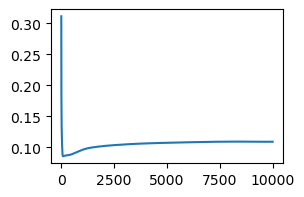

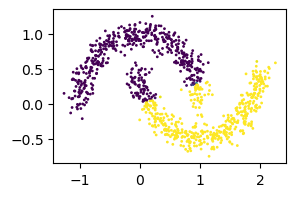

Minimum cost:  0.08559947632784083
Final cost:  0.10910061560151889
Learning rate:  0.01  Hidden layer size:  8


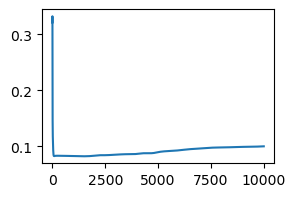

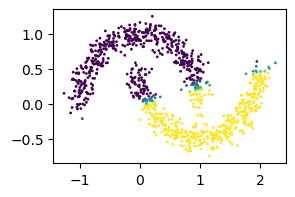

Minimum cost:  0.08225725182113391
Final cost:  0.10005149399295132
Learning rate:  0.01  Hidden layer size:  16


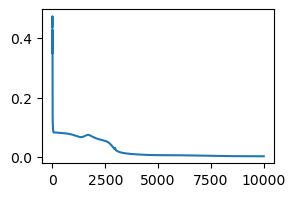

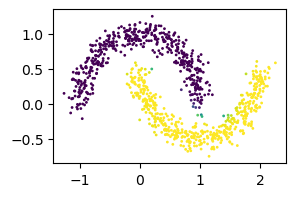

Minimum cost:  0.0017205989366205553
Final cost:  0.0017205989366205553
Learning rate:  0.01  Hidden layer size:  20


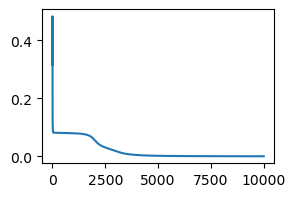

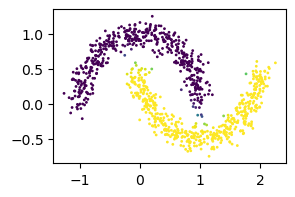

Minimum cost:  0.0006465963131250893
Final cost:  0.0006465963131250893
Learning rate:  0.01  Hidden layer size:  24


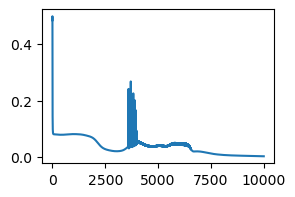

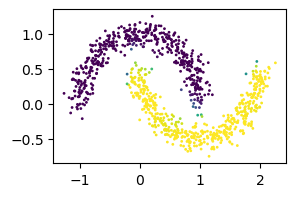

Minimum cost:  0.0034204656139222717
Final cost:  0.0034204656139222717
Learning rate:  0.001  Hidden layer size:  2


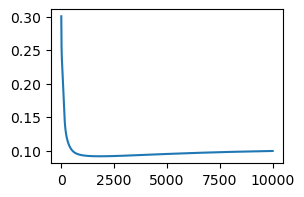

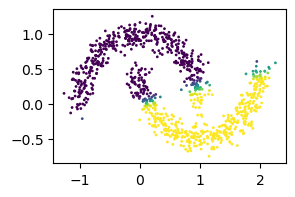

Minimum cost:  0.09187034018399626
Final cost:  0.09975749375443968
Learning rate:  0.001  Hidden layer size:  8


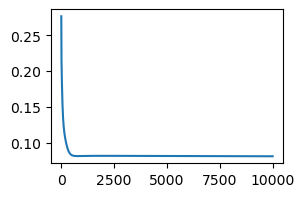

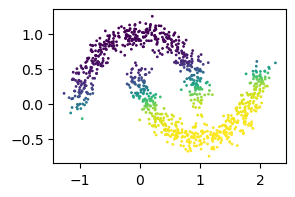

Minimum cost:  0.0812682436703277
Final cost:  0.0812682436703277
Learning rate:  0.001  Hidden layer size:  16


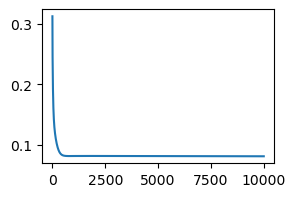

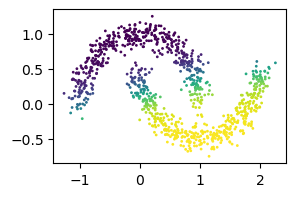

Minimum cost:  0.08091523066111614
Final cost:  0.08091523066111614
Learning rate:  0.001  Hidden layer size:  20


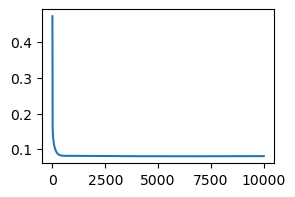

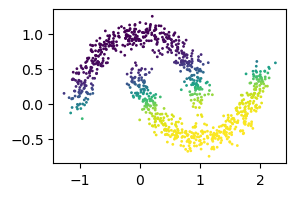

Minimum cost:  0.08018389980431898
Final cost:  0.08068102331041035
Learning rate:  0.001  Hidden layer size:  24


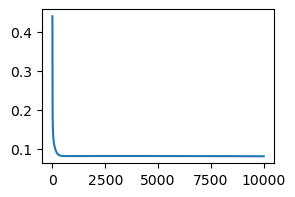

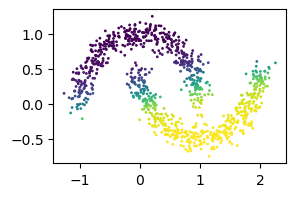

Minimum cost:  0.08146422931294543
Final cost:  0.08146422931294543


In [32]:
for lr in [1,0.1, 0.01, 0.001]:
    for h_n_size in [2, 8,16,20,24]:
        print("Learning rate: ", lr, " Hidden layer size: ", h_n_size)
        output_layer = algorithm_one_hidden_layers(
            inputs, outputs, h_n_size=h_n_size, epochs=10000, lr=lr  )
        

#### Explain why we have the combination of 2, 2 and 2, 1 for the weight matrices, and 1, 2,and 1, 1 for the bias?

**weights_input_hidden (2, 2): This matrix connects the input layer (2 neurons) to the hidden layer (2 neurons). The shape (2, 2) indicates 2 rows (one for each input neuron) and 2 columns (one for each hidden neuron), representing the weights for the connections from each input to each hidden neuron.**

**weights_hidden_output (2, 1): This matrix connects the hidden layer (2 neurons) to the output layer (1 neuron). The shape (2, 1) indicates 2 rows (one for each hidden neuron) and 1 column (for the single output neuron), representing the weights from each hidden neuron to the output.**

**bias_hidden (1, 2): This bias vector is added to the hidden layer and has a shape of (1, 2) because there are 2 hidden neurons, each requiring one bias term. The single row allows broadcasting across the batch of inputs.**

**bias_output (1, 1): This bias is added to the output layer and has a shape of (1, 1) because there is 1 output neuron, requiring a single bias term.**

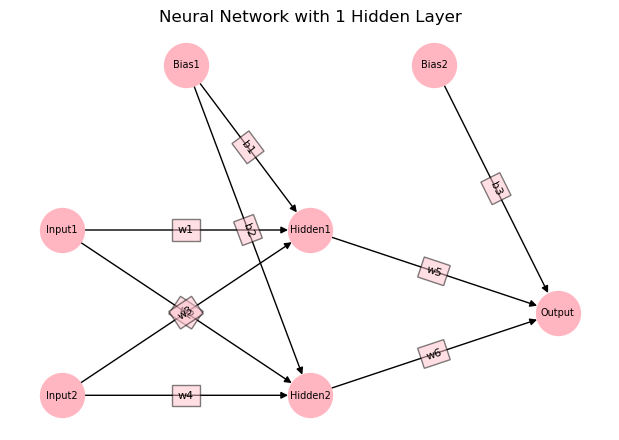

In [28]:
import networkx as nx



G = nx.DiGraph()

# Add nodes
G.add_node("Input1", layer="input")
G.add_node("Input2", layer="input")
G.add_node("Hidden1", layer="hidden")
G.add_node("Hidden2", layer="hidden")
G.add_node("Output", layer="output")
G.add_node("Bias1", layer="bias")
G.add_node("Bias2", layer="bias")


G.add_edge("Input1", "Hidden1", weight="w1")
G.add_edge("Input1", "Hidden2", weight="w2")
G.add_edge("Input2", "Hidden1", weight="w3")
G.add_edge("Input2", "Hidden2", weight="w4")
G.add_edge("Hidden1", "Output", weight="w5")
G.add_edge("Hidden2", "Output", weight="w6")
G.add_edge("Bias1", "Hidden1", weight="b1")
G.add_edge("Bias1", "Hidden2", weight="b2")
G.add_edge("Bias2", "Output", weight="b3")

pos = {
    "Input1": (0, 1), "Input2": (0, 0),
    "Hidden1": (1, 1), "Hidden2": (1, 0),
    "Output": (2, 0.5),
    "Bias1": (0.5, 2), "Bias2": (1.5, 2)
}


plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_color='lightpink', node_size=1000, font_size=7, arrows=True)


edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='black', label_pos=0.5, bbox=dict(facecolor='pink', alpha=0.5))

plt.title("Neural Network with 1 Hidden Layer")
plt.show()

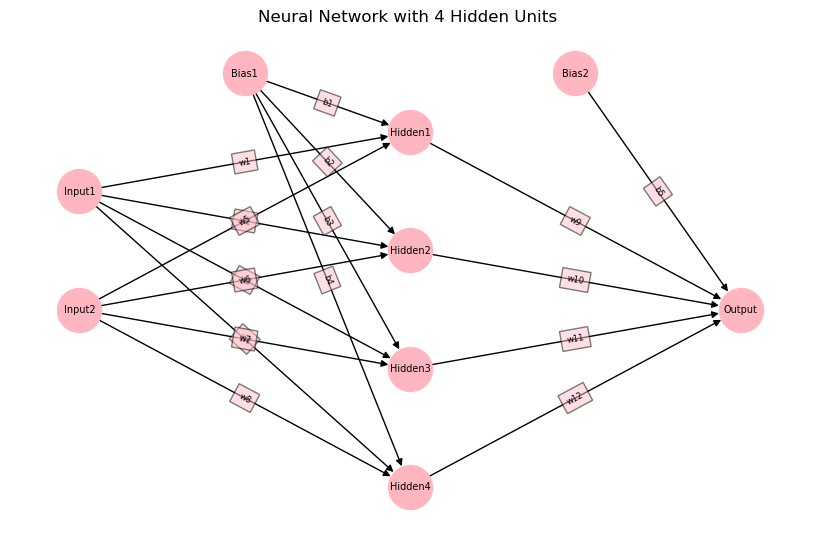

In [30]:

G = nx.DiGraph()

G.add_node("Input1", layer="input")
G.add_node("Input2", layer="input")
G.add_node("Hidden1", layer="hidden")
G.add_node("Hidden2", layer="hidden")
G.add_node("Hidden3", layer="hidden")
G.add_node("Hidden4", layer="hidden")
G.add_node("Output", layer="output")
G.add_node("Bias1", layer="bias")  
G.add_node("Bias2", layer="bias")  


G.add_edge("Input1", "Hidden1", weight="w1")
G.add_edge("Input1", "Hidden2", weight="w2")
G.add_edge("Input1", "Hidden3", weight="w3")
G.add_edge("Input1", "Hidden4", weight="w4")
G.add_edge("Input2", "Hidden1", weight="w5")
G.add_edge("Input2", "Hidden2", weight="w6")
G.add_edge("Input2", "Hidden3", weight="w7")
G.add_edge("Input2", "Hidden4", weight="w8")
G.add_edge("Hidden1", "Output", weight="w9")
G.add_edge("Hidden2", "Output", weight="w10")
G.add_edge("Hidden3", "Output", weight="w11")
G.add_edge("Hidden4", "Output", weight="w12")
G.add_edge("Bias1", "Hidden1", weight="b1")
G.add_edge("Bias1", "Hidden2", weight="b2")
G.add_edge("Bias1", "Hidden3", weight="b3")
G.add_edge("Bias1", "Hidden4", weight="b4")
G.add_edge("Bias2", "Output", weight="b5")

pos = {
    "Input1": (0, 1), "Input2": (0, 0),
    "Hidden1": (1, 1.5), "Hidden2": (1, 0.5), "Hidden3": (1, -0.5), "Hidden4": (1, -1.5),
    "Output": (2, 0),
    "Bias1": (0.5, 2), "Bias2": (1.5, 2)
}


plt.figure(figsize=(8, 5))
nx.draw(G, pos, with_labels=True, node_color='lightpink', node_size=1000, font_size=7, arrows=True)


edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6, font_color='black', label_pos=0.5, bbox=dict(facecolor='pink', alpha=0.5))

plt.title("Neural Network with 4 Hidden Units ")
plt.show()

In [ ]:
def algorithm_two_hidden_layers(inputs,outputs,h1_n_size,h2_n_size,epochs= 1000, lr=1):

    
    weights_input_hidden1 = weights(inputs.shape[1], h1_n_size)
    weights_hidden1_hidden2 = weights(h1_n_size, h2_n_size)
    weights_hidden2_output = weights(h2_n_size, outputs.shape[1])

    bias_hidden1 = bias(h1_n_size)
    bias_hidden2 = bias(h2_n_size)
    bias_output = bias(outputs.shape[1])

    cost_graph = []

    for epoch in range(10000):
        hidden_layer1 = sigmoid(np.dot(inputs, weights_input_hidden1)+ bias_hidden1)

        hidden_layer2 = sigmoid(np.dot(hidden_layer1, weights_hidden1_hidden2)+ bias_hidden2)

        output_layer = sigmoid(np.dot(hidden_layer2, weights_hidden2_output)+ bias_output)

        output_error = outputs - output_layer
        cost_graph.append(np.mean(np.square(output_error)))
        output_delta = output_error * sigmoid_derivative(output_layer)
        hidden2_delta = output_delta.dot(weights_hidden2_output.T) *sigmoid_derivative(hidden_layer2)
        hidden1_delta = hidden2_delta.dot(weights_hidden1_hidden2.T) *sigmoid_derivative(hidden_layer1)
        weights_hidden2_output += lr * hidden_layer2.T.dot(output_delta)
        weights_hidden1_hidden2 += lr * hidden_layer1.T.dot(hidden2_delta)
        weights_input_hidden1 += lr * inputs.T.dot(hidden1_delta)
        bias_hidden1 += lr * np.sum(hidden1_delta, axis=0, keepdims=True)
        bias_hidden2 += lr * np.sum(hidden2_delta, axis=0, keepdims=True)
        bias_output += lr * np.sum(output_delta, axis=0, keepdims=True)
       
    min_cost ,final_cost = plot_cost_graph(cost_graph, inputs[:, 0], inputs[:, 1], output_layer)
    print("Minimum cost: ", min_cost)
    print("Final cost: ", final_cost)
    return  output_layer






Learning rate:  0.1  Hidden layer 1 size:  2
Hidden layer 2 size:  2
--------------------------------------------------


/tmp/ipykernel_7582/3107163528.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


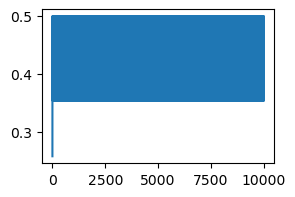

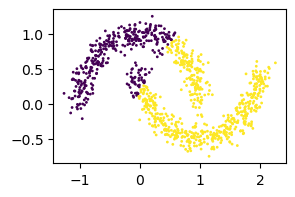

Minimum cost:  0.25703811139055277
Final cost:  0.46739152005170603
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  2
Hidden layer 2 size:  8
--------------------------------------------------


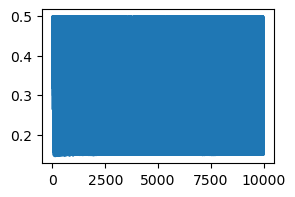

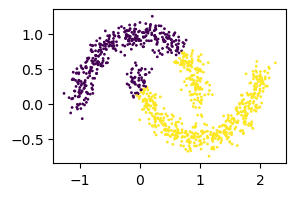

Minimum cost:  0.14517028587804306
Final cost:  0.1705229751830756
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  2
Hidden layer 2 size:  16
--------------------------------------------------


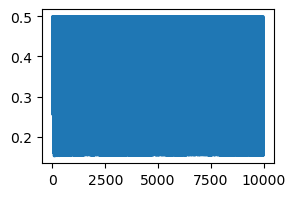

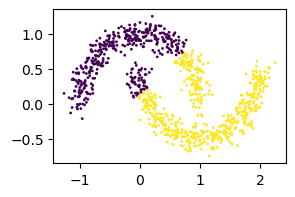

Minimum cost:  0.1515713614501385
Final cost:  0.48806703538342244
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  2
Hidden layer 2 size:  20
--------------------------------------------------


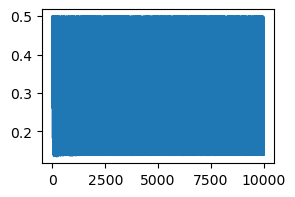

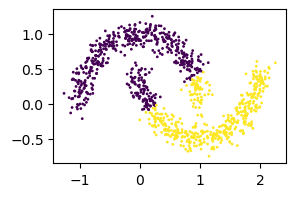

Minimum cost:  0.13529229620393537
Final cost:  0.13927759503171405
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  2
Hidden layer 2 size:  24
--------------------------------------------------


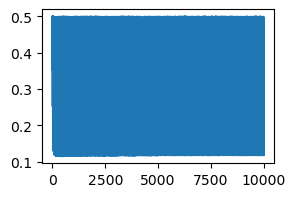

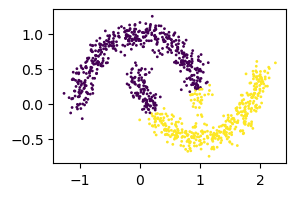

Minimum cost:  0.1154461560342577
Final cost:  0.11871160473390356
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  8
Hidden layer 2 size:  2
--------------------------------------------------


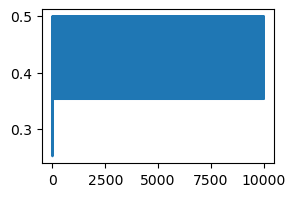

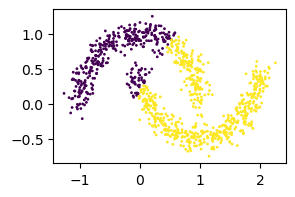

Minimum cost:  0.2521612311906909
Final cost:  0.4984279867355699
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  8
Hidden layer 2 size:  8
--------------------------------------------------


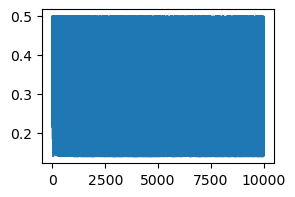

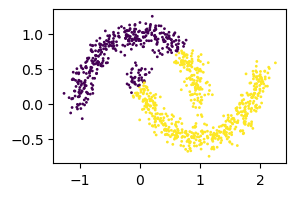

Minimum cost:  0.1408302868334565
Final cost:  0.14594978371732964
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  8
Hidden layer 2 size:  16
--------------------------------------------------


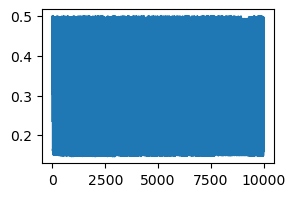

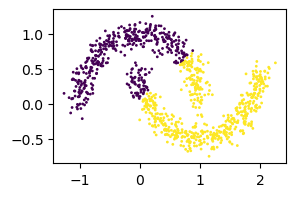

Minimum cost:  0.1465735128741356
Final cost:  0.16184954542037333
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  8
Hidden layer 2 size:  20
--------------------------------------------------


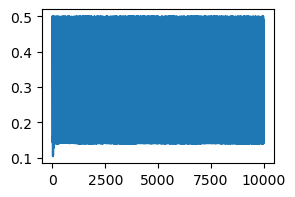

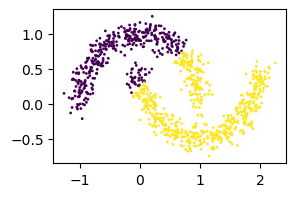

Minimum cost:  0.10431264145610002
Final cost:  0.45272725941362385
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  8
Hidden layer 2 size:  24
--------------------------------------------------


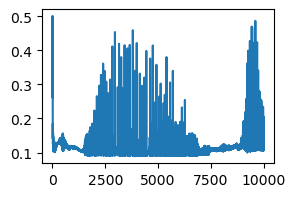

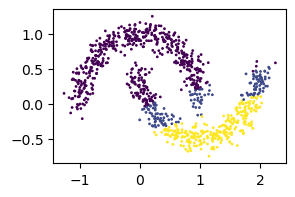

Minimum cost:  0.08901629800021887
Final cost:  0.1749025495039615
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  16
Hidden layer 2 size:  2
--------------------------------------------------


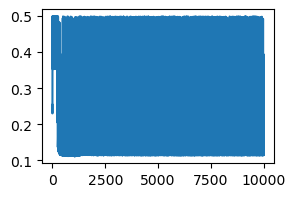

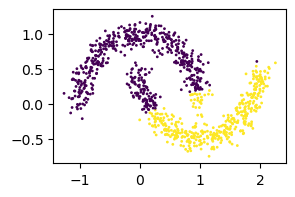

Minimum cost:  0.11139453624756118
Final cost:  0.11578211808113859
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  16
Hidden layer 2 size:  8
--------------------------------------------------


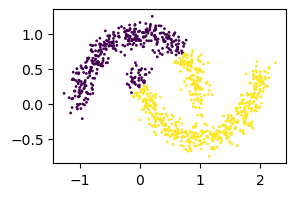

Minimum cost:  0.09880055477187778
Final cost:  0.14255018385099666
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  16
Hidden layer 2 size:  16
--------------------------------------------------


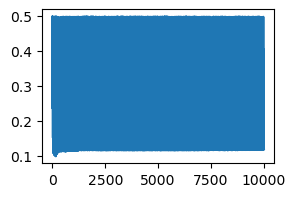

Minimum cost:  0.0998893695663742
Final cost:  0.1199924672286694
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  16
Hidden layer 2 size:  20
--------------------------------------------------


Minimum cost:  0.1429058805541344
Final cost:  0.17312398409892718
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  16
Hidden layer 2 size:  24
--------------------------------------------------


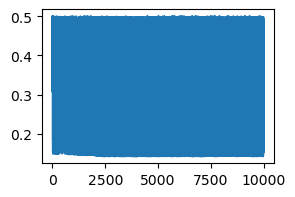

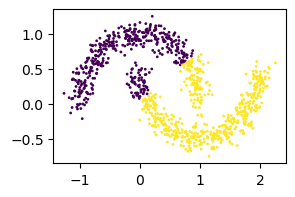

Minimum cost:  0.1428999808352103
Final cost:  0.1641454326248626
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  20
Hidden layer 2 size:  2
--------------------------------------------------


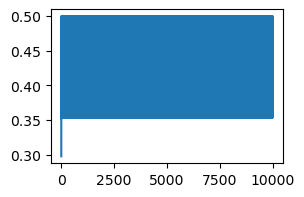

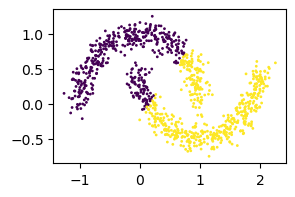

Minimum cost:  0.2975966067975417
Final cost:  0.4984279792003676
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  20
Hidden layer 2 size:  8
--------------------------------------------------


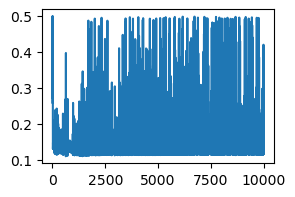

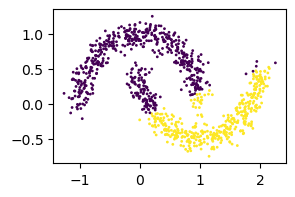

Minimum cost:  0.10971389802184618
Final cost:  0.12072841422593601
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  20
Hidden layer 2 size:  16
--------------------------------------------------


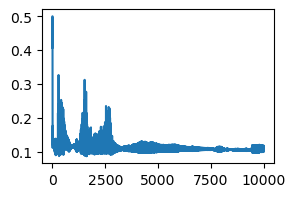

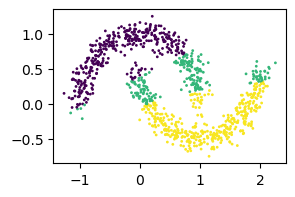

Minimum cost:  0.08734240203323955
Final cost:  0.103307387568207
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  20
Hidden layer 2 size:  20
--------------------------------------------------


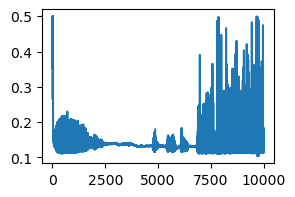

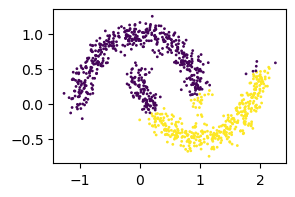

Minimum cost:  0.10333777245925006
Final cost:  0.11764554772007738
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  20
Hidden layer 2 size:  24
--------------------------------------------------


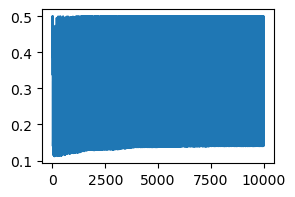

Minimum cost:  0.11179018790787085
Final cost:  0.1450119852811741
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  24
Hidden layer 2 size:  2
--------------------------------------------------


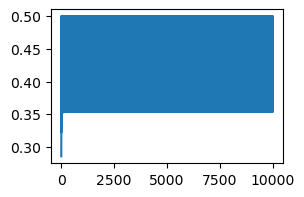

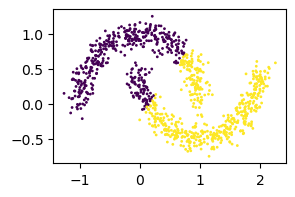

Minimum cost:  0.28562683769509845
Final cost:  0.4984279765148198
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  24
Hidden layer 2 size:  8
--------------------------------------------------


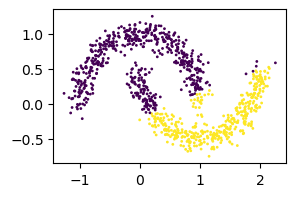

Minimum cost:  0.1122466871636014
Final cost:  0.11952628623873046
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  24
Hidden layer 2 size:  16
--------------------------------------------------


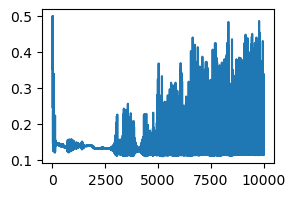

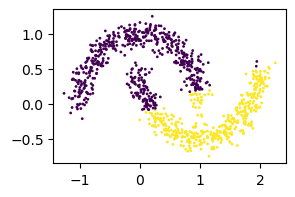

Minimum cost:  0.1094637784211414
Final cost:  0.11520993912736267
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  24
Hidden layer 2 size:  20
--------------------------------------------------


Minimum cost:  0.09179464500008734
Final cost:  0.16767185719902333
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  24
Hidden layer 2 size:  24
--------------------------------------------------


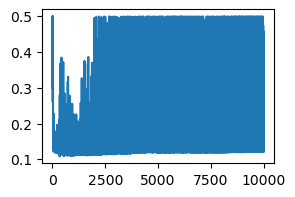

Minimum cost:  0.108309356849613
Final cost:  0.12174632456227323
Output layer shape:  (1000, 1)


In [34]:
lr = 0.1
for h1_n_size in [2,8, 16, 20, 24]:
    
    for h2_n_size in [2,8, 16, 20, 24]:
        print("Learning rate: ", lr, " Hidden layer 1 size: ", h1_n_size)
        print("Hidden layer 2 size: ", h2_n_size)
        print("--------------------------------------------------")
        output_layer = algorithm_two_hidden_layers(
            inputs, outputs, h1_n_size=h1_n_size, h2_n_size=h2_n_size, epochs=10000, lr=lr )
        print("Output layer shape: ", output_layer.shape)
      



Learning rate:  0.1  Hidden layer 1 size:  2
Hidden layer 2 size:  2
--------------------------------------------------


/tmp/ipykernel_7582/3107163528.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


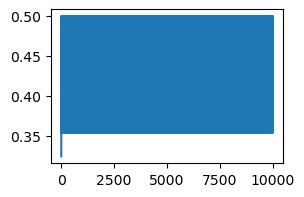

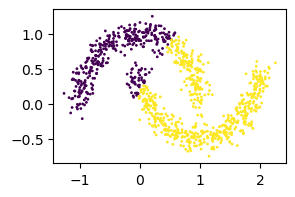

Minimum cost:  0.3239716708888177
Final cost:  0.49975122844790965
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  2
Hidden layer 2 size:  4
--------------------------------------------------


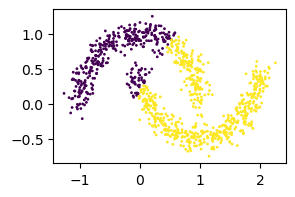

Minimum cost:  0.24234241740804352
Final cost:  0.49842799515125824
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  2
Hidden layer 2 size:  6
--------------------------------------------------


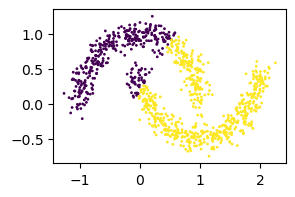

Minimum cost:  0.2504183156176014
Final cost:  0.4984280209557392
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  2
Hidden layer 2 size:  8
--------------------------------------------------


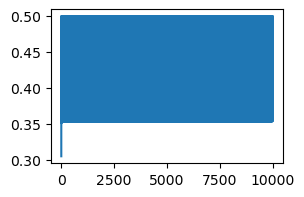

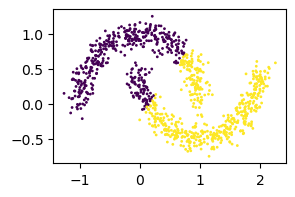

Minimum cost:  0.30470612211516673
Final cost:  0.49975127906208716
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  2
Hidden layer 2 size:  16
--------------------------------------------------


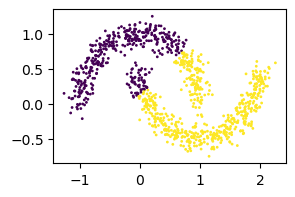

Minimum cost:  0.1521806897843838
Final cost:  0.49943812473883464
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  2
Hidden layer 2 size:  20
--------------------------------------------------


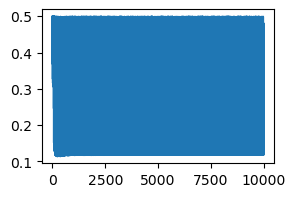

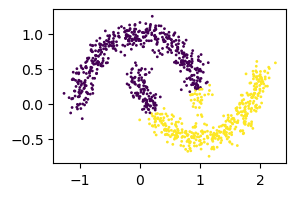

Minimum cost:  0.11422043441589333
Final cost:  0.12000084805495714
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  2
Hidden layer 2 size:  24
--------------------------------------------------


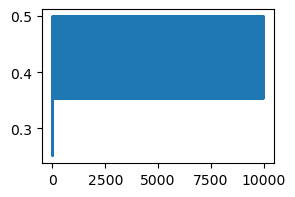

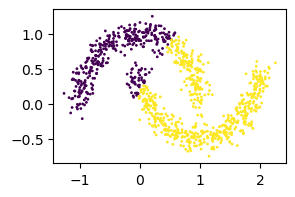

Minimum cost:  0.25005409804862216
Final cost:  0.498428234377065
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  2
Hidden layer 2 size:  28
--------------------------------------------------


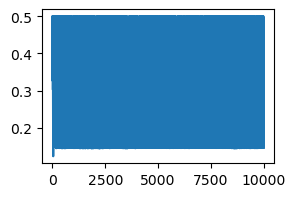

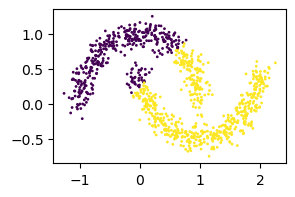

Minimum cost:  0.12347295137364825
Final cost:  0.146018854230429
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  4
Hidden layer 2 size:  2
--------------------------------------------------


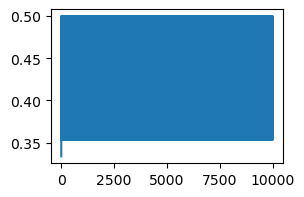

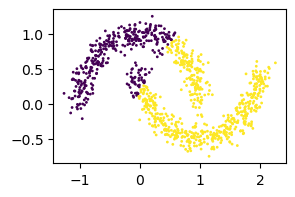

Minimum cost:  0.3338288416182224
Final cost:  0.4673915160084396
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  4
Hidden layer 2 size:  4
--------------------------------------------------


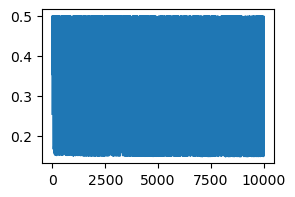

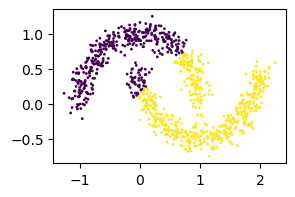

Minimum cost:  0.1495402879250402
Final cost:  0.16226680958901765
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  4
Hidden layer 2 size:  6
--------------------------------------------------


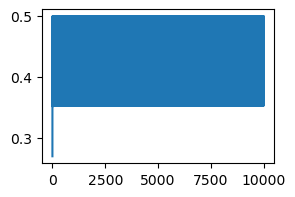

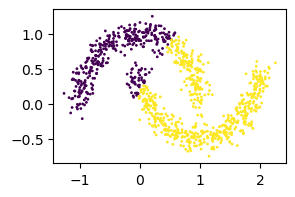

Minimum cost:  0.2703717823954402
Final cost:  0.4984280383088176
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  4
Hidden layer 2 size:  8
--------------------------------------------------


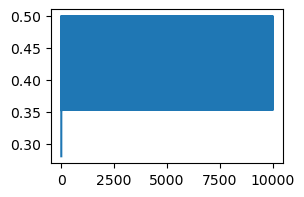

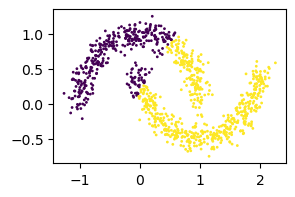

Minimum cost:  0.2809413440185484
Final cost:  0.4673915082187009
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  4
Hidden layer 2 size:  16
--------------------------------------------------


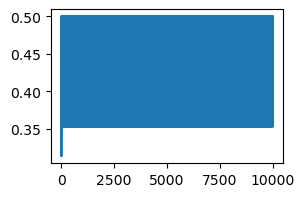

Minimum cost:  0.31337581901306677
Final cost:  0.49975931710038174
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  4
Hidden layer 2 size:  20
--------------------------------------------------


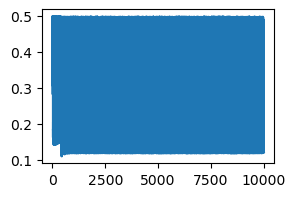

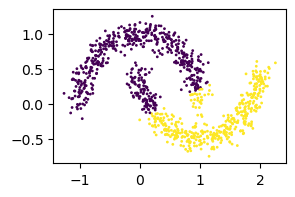

Minimum cost:  0.10938880729107361
Final cost:  0.12029473297027604
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  4
Hidden layer 2 size:  24
--------------------------------------------------


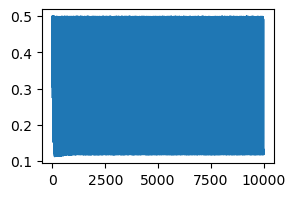

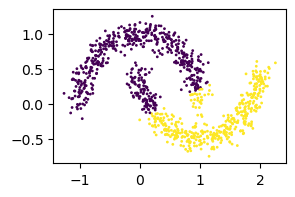

Minimum cost:  0.11238433690668782
Final cost:  0.13009097705098902
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  4
Hidden layer 2 size:  28
--------------------------------------------------


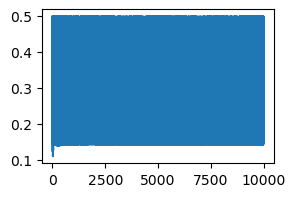

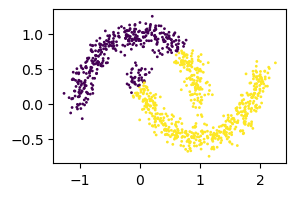

Minimum cost:  0.10948269900466033
Final cost:  0.16709784679739634
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  6
Hidden layer 2 size:  2
--------------------------------------------------


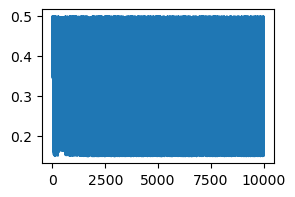

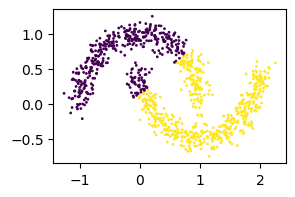

Minimum cost:  0.1495475108281044
Final cost:  0.3725474812906671
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  6
Hidden layer 2 size:  4
--------------------------------------------------


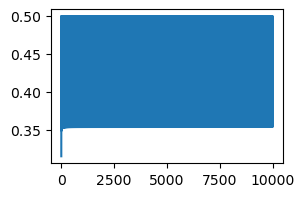

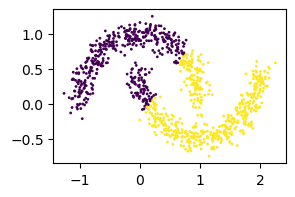

Minimum cost:  0.31481054522669943
Final cost:  0.46739187054771025
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  6
Hidden layer 2 size:  6
--------------------------------------------------


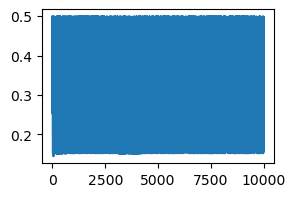

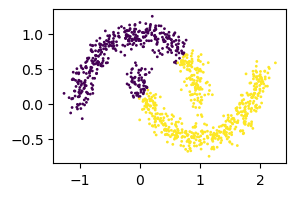

Minimum cost:  0.14410748760430317
Final cost:  0.4950062004096616
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  6
Hidden layer 2 size:  8
--------------------------------------------------


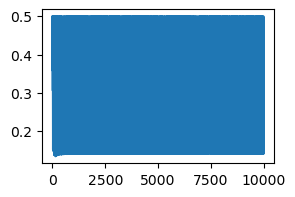

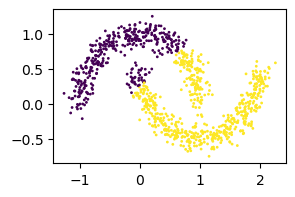

Minimum cost:  0.13473799960062122
Final cost:  0.14233633654989664
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  6
Hidden layer 2 size:  16
--------------------------------------------------


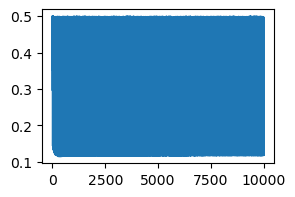

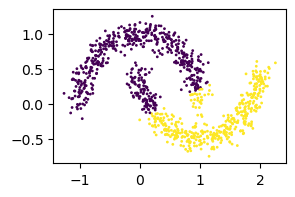

Minimum cost:  0.11523272039822657
Final cost:  0.1217055923428783
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  6
Hidden layer 2 size:  20
--------------------------------------------------


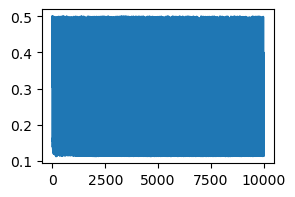

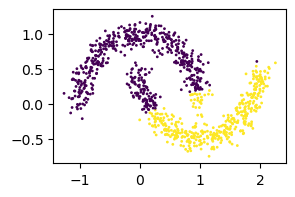

Minimum cost:  0.1134512583634445
Final cost:  0.12879452231103988
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  6
Hidden layer 2 size:  24
--------------------------------------------------


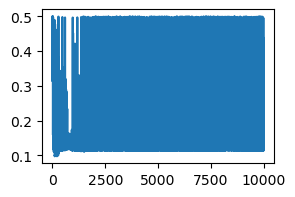

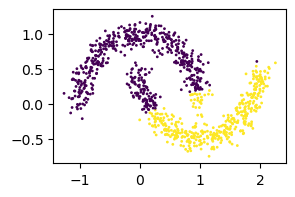

Minimum cost:  0.09754621183993575
Final cost:  0.49303601557526205
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  6
Hidden layer 2 size:  28
--------------------------------------------------


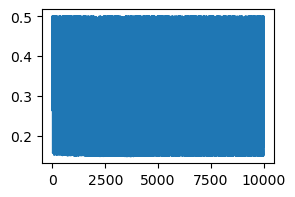

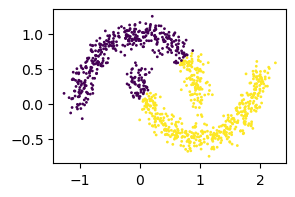

Minimum cost:  0.14779252529962206
Final cost:  0.29303659796692977
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  8
Hidden layer 2 size:  2
--------------------------------------------------


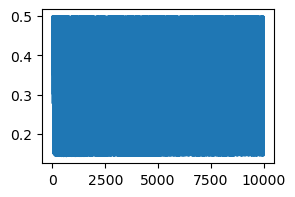

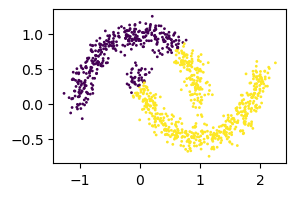

Minimum cost:  0.14309171020742223
Final cost:  0.15087263768045409
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  8
Hidden layer 2 size:  4
--------------------------------------------------


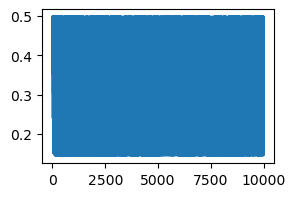

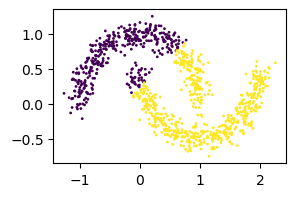

Minimum cost:  0.14293208164301818
Final cost:  0.18310966150542674
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  8
Hidden layer 2 size:  6
--------------------------------------------------


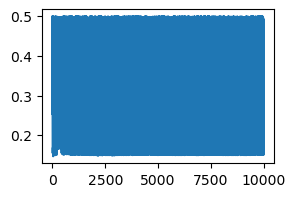

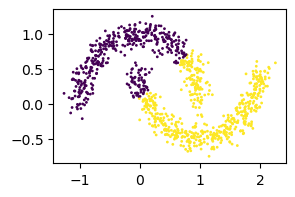

Minimum cost:  0.1466173251946453
Final cost:  0.1703338352748412
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  8
Hidden layer 2 size:  8
--------------------------------------------------


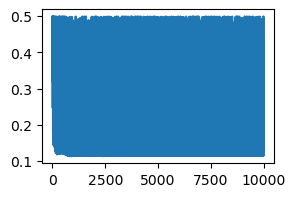

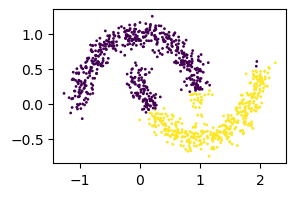

Minimum cost:  0.11290398522027319
Final cost:  0.11587200138441685
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  8
Hidden layer 2 size:  16
--------------------------------------------------


Minimum cost:  0.08895209454386238
Final cost:  0.35281991127208195
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  8
Hidden layer 2 size:  20
--------------------------------------------------


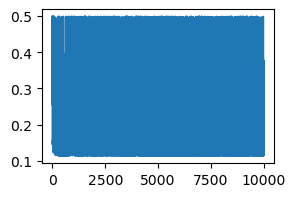

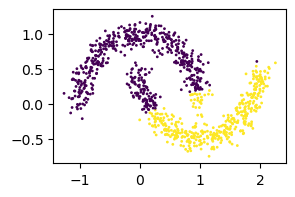

Minimum cost:  0.11191750443873959
Final cost:  0.11834033618054242
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  8
Hidden layer 2 size:  24
--------------------------------------------------


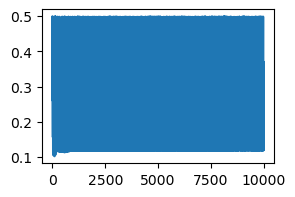

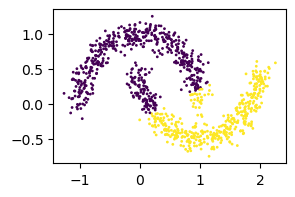

Minimum cost:  0.1014460704103505
Final cost:  0.12125816068926532
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  8
Hidden layer 2 size:  28
--------------------------------------------------


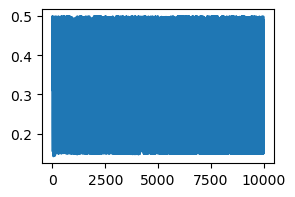

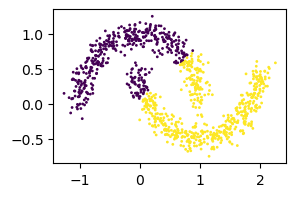

Minimum cost:  0.14186198928735416
Final cost:  0.46438782838909515
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  16
Hidden layer 2 size:  2
--------------------------------------------------


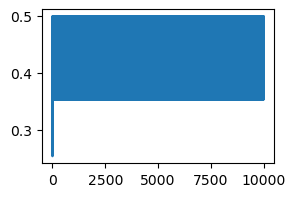

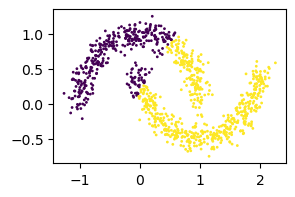

Minimum cost:  0.25385535954001853
Final cost:  0.4673914548495478
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  16
Hidden layer 2 size:  4
--------------------------------------------------


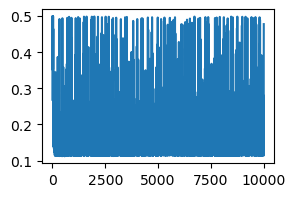

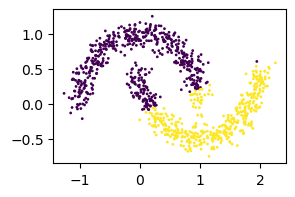

Minimum cost:  0.11193753165113586
Final cost:  0.4781820822158479
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  16
Hidden layer 2 size:  6
--------------------------------------------------


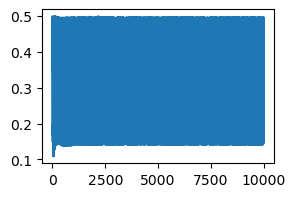

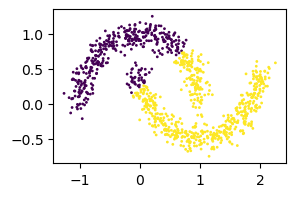

Minimum cost:  0.10885054947153325
Final cost:  0.14810995197619733
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  16
Hidden layer 2 size:  8
--------------------------------------------------


Minimum cost:  0.14526579780659388
Final cost:  0.1463731510763306
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  16
Hidden layer 2 size:  16
--------------------------------------------------


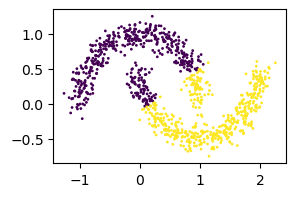

Minimum cost:  0.11093621901071743
Final cost:  0.13856107829383524
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  16
Hidden layer 2 size:  20
--------------------------------------------------


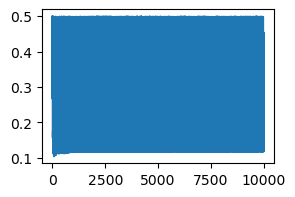

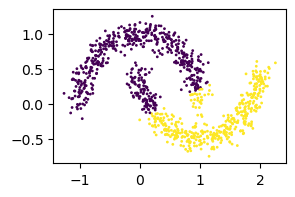

Minimum cost:  0.10448542389482751
Final cost:  0.12146558318879307
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  16
Hidden layer 2 size:  24
--------------------------------------------------


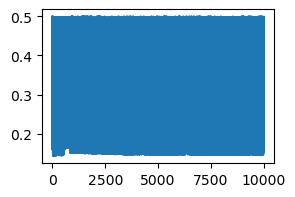

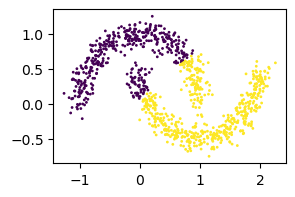

Minimum cost:  0.1422538206402132
Final cost:  0.4984803071142301
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  16
Hidden layer 2 size:  28
--------------------------------------------------


Minimum cost:  0.13649897956372717
Final cost:  0.4032074337826084
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  20
Hidden layer 2 size:  2
--------------------------------------------------


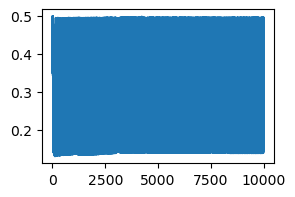

Minimum cost:  0.1307119549538063
Final cost:  0.43548697085756694
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  20
Hidden layer 2 size:  4
--------------------------------------------------


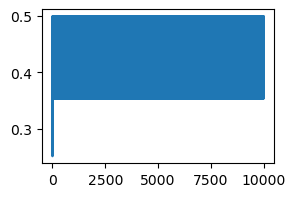

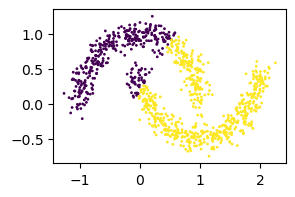

Minimum cost:  0.25082901659777523
Final cost:  0.49842802277217174
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  20
Hidden layer 2 size:  6
--------------------------------------------------


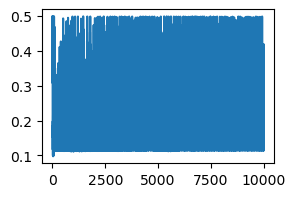

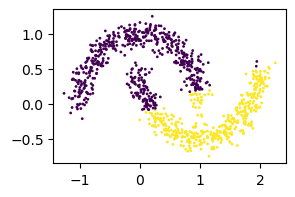

Minimum cost:  0.09721123239003095
Final cost:  0.11477725662212661
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  20
Hidden layer 2 size:  8
--------------------------------------------------


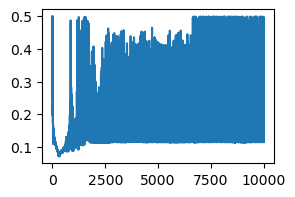

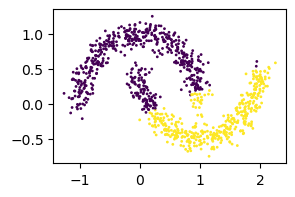

Minimum cost:  0.07078422764517606
Final cost:  0.18752907930070964
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  20
Hidden layer 2 size:  16
--------------------------------------------------


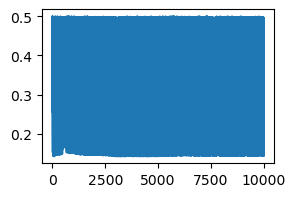

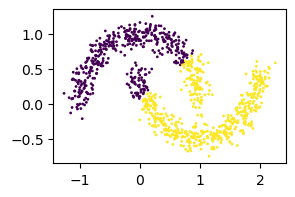

Minimum cost:  0.14290489703559672
Final cost:  0.1441330767663016
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  20
Hidden layer 2 size:  20
--------------------------------------------------


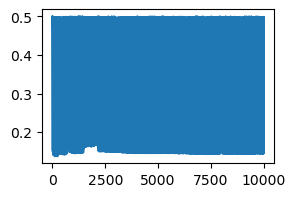

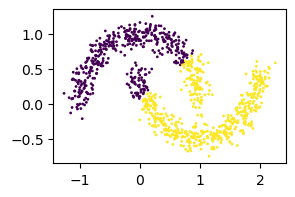

Minimum cost:  0.13790788681562435
Final cost:  0.4981275867361777
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  20
Hidden layer 2 size:  24
--------------------------------------------------


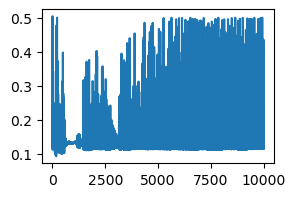

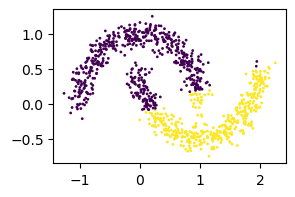

Minimum cost:  0.09205060594833549
Final cost:  0.117438098808418
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  20
Hidden layer 2 size:  28
--------------------------------------------------


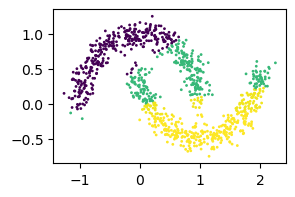

Minimum cost:  0.08671165153833135
Final cost:  0.10241857924270824
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  24
Hidden layer 2 size:  2
--------------------------------------------------


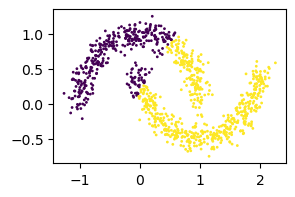

Minimum cost:  0.25203049821104256
Final cost:  0.3535334816591665
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  24
Hidden layer 2 size:  4
--------------------------------------------------


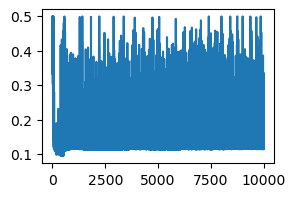

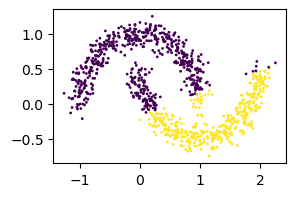

Minimum cost:  0.09347218077380816
Final cost:  0.1159345061486732
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  24
Hidden layer 2 size:  6
--------------------------------------------------


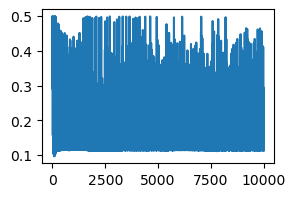

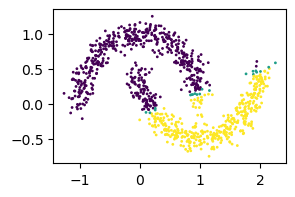

Minimum cost:  0.09629238844028387
Final cost:  0.11277000251300408
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  24
Hidden layer 2 size:  8
--------------------------------------------------


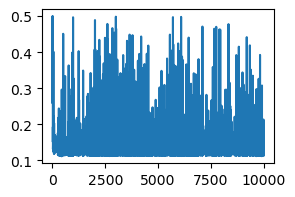

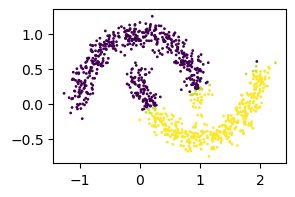

Minimum cost:  0.11132994648581802
Final cost:  0.164657645245534
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  24
Hidden layer 2 size:  16
--------------------------------------------------


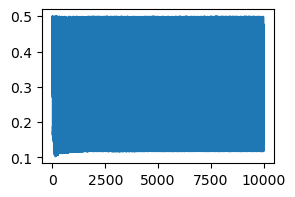

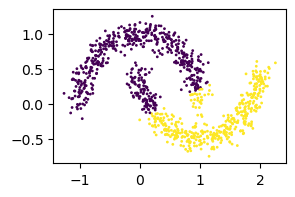

Minimum cost:  0.10336166380633549
Final cost:  0.12068816744737333
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  24
Hidden layer 2 size:  20
--------------------------------------------------


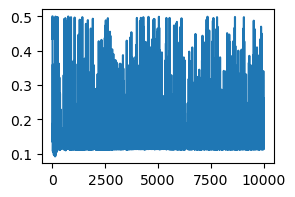

Minimum cost:  0.09296960016802754
Final cost:  0.13252109677542312
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  24
Hidden layer 2 size:  24
--------------------------------------------------


Minimum cost:  0.100533734578238
Final cost:  0.11636489686642106
Output layer shape:  (1000, 1)
Learning rate:  0.1  Hidden layer 1 size:  24
Hidden layer 2 size:  28
--------------------------------------------------


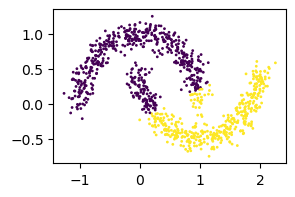

Minimum cost:  0.09997013179389179
Final cost:  0.11996391301904742
Output layer shape:  (1000, 1)


In [35]:
lr = 0.1
for h1_n_size in [2,4,6,8, 16, 20, 24]:
    
    for h2_n_size in [2,4,6,8, 16, 20, 24,28]:
        print("Learning rate: ", lr, " Hidden layer 1 size: ", h1_n_size)
        print("Hidden layer 2 size: ", h2_n_size)
        print("--------------------------------------------------")
        output_layer = algorithm_two_hidden_layers(
            inputs, outputs, h1_n_size=h1_n_size, h2_n_size=h2_n_size, epochs=10000, lr=lr )
        print("Output layer shape: ", output_layer.shape)
      

